In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
from filtering_visualization import data_visualization

In [3]:
# identity DD: 72593, 71427
# identity PC: 129763, 133760
num_source_cl=72593
num_target_cl=71427
dataset="DailyDialog"
clustering_method="identity_clustering"

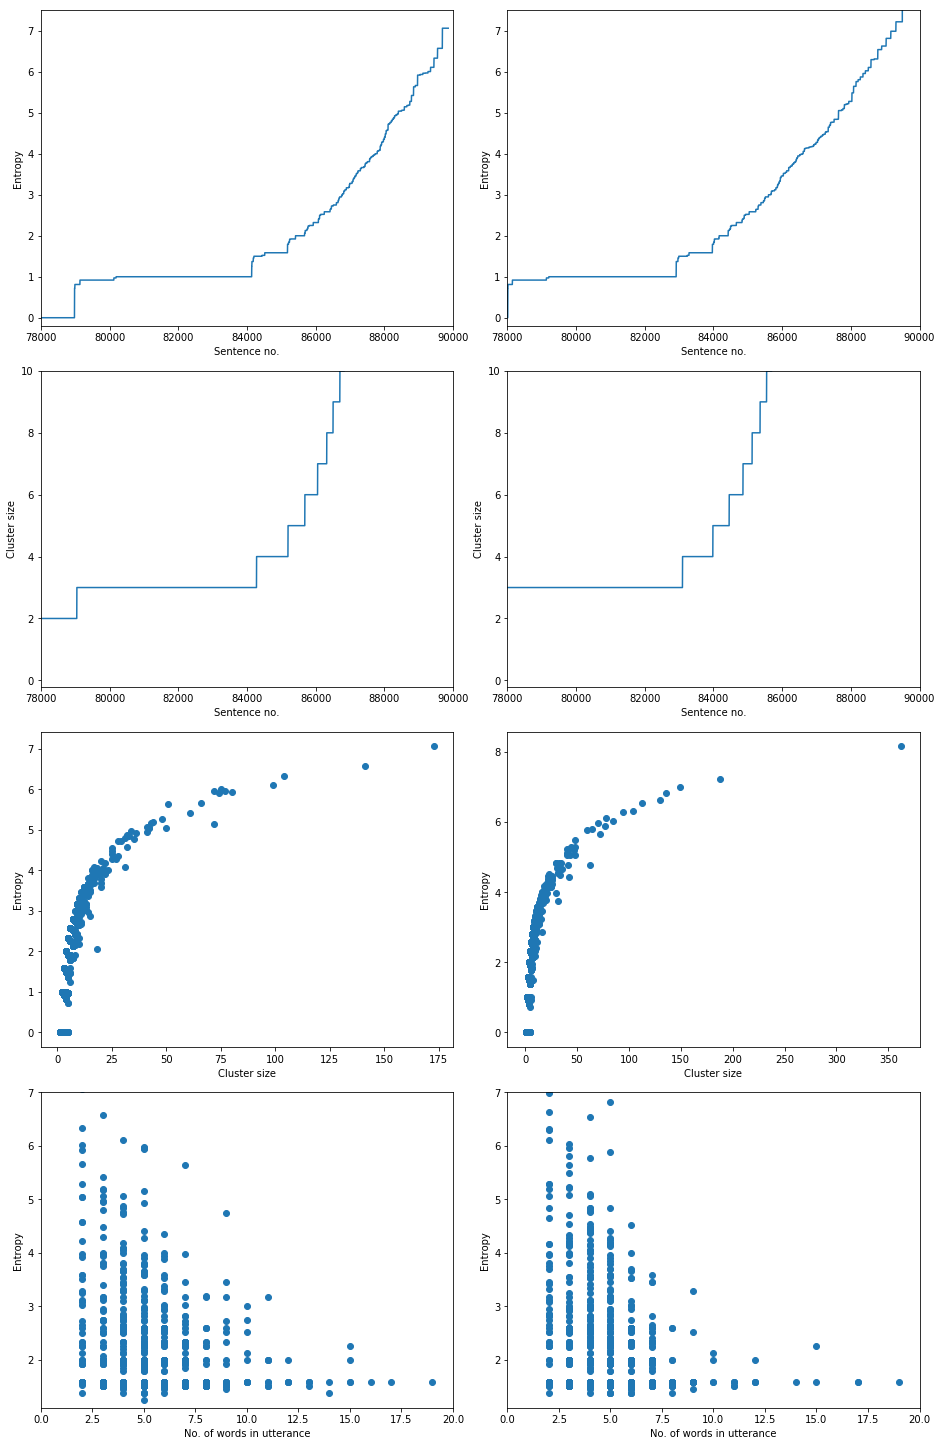

In [4]:
source_entropies, target_entropies, source_cl_sizes, target_cl_sizes = \
    data_visualization(num_source_cl, num_target_cl, dataset, clustering_method)

In [10]:
# compare filtering based on cluster size and entropy
source_cl_sen=[scl[0] for scl in source_cl_sizes]
source_entropy_sen=[m[0] for m in source_entropies]
different=0
first_k=700

for i, medoid in enumerate(source_entropies[:first_k]):
    if medoid[0] not in source_cl_sen[:first_k]:
        #print(medoid)
        different+=1
print(str(different)+": number of sentences which are different in the first "+str(first_k)
      +", ordered based on entropy and cluster size: ")

for i, medoid in enumerate(source_cl_sizes[:first_k]):
    if medoid[0] not in source_entropy_sen[:first_k]:
        print(medoid)

215: number of sentences which are different in the first 700, ordered based on entropy and cluster size: 
['yes but you might have told me before .', 5]
['when do you want to move in ?', 5]
["why did n't you tell me you had a girlfriend ?", 5]
['your knowledge of english is really surprising .', 5]
["you know you did n't .", 5]
['what s the time ?', 5]
["did n't i ?", 5]
['i feel the same way .', 5]
['mary how was your date with john ?', 5]
["it 's a lovely day is n't it ?", 5]
['right !', 5]
["oh it 's nothing to speak of .", 5]
['are you feeling better today bill ?', 5]
['but she means a lot to me .', 5]
['he is tall and slim fairhaired .', 5]
['are they ?', 5]
["what 's so great about it ?", 5]
["sorry i did n't think it mattered .", 5]
['what would you like for dessert ?', 5]
['sorry i thought you knew .', 5]
['is it very cold in winter ?', 4]
['what color are her eyes ?', 4]
['ok . goodbye .', 4]
['merry christmas !', 4]
['what do you do there ?', 4]
['wow ! why so much ? i thoug